# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score

# Load the Dataset

In [2]:
file_path = "C:/Users/sup142/Documents/loan_data.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df = df.copy()

label_encoders = {}

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df.loc[:, col] = label_encoders[col].fit_transform(df[col]) 

print("Categorical columns successfully encoded!")

Categorical columns successfully encoded!


In [6]:
print(df.isnull())

       person_age  person_gender  person_education  person_income  \
0           False          False             False          False   
1           False          False             False          False   
2           False          False             False          False   
3           False          False             False          False   
4           False          False             False          False   
...           ...            ...               ...            ...   
44995       False          False             False          False   
44996       False          False             False          False   
44997       False          False             False          False   
44998       False          False             False          False   
44999       False          False             False          False   

       person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
0               False                  False      False        False   
1               False      

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44995    False
44996    False
44997    False
44998    False
44999    False
Length: 45000, dtype: bool

In [8]:
df['loan_status'].nunique()

2

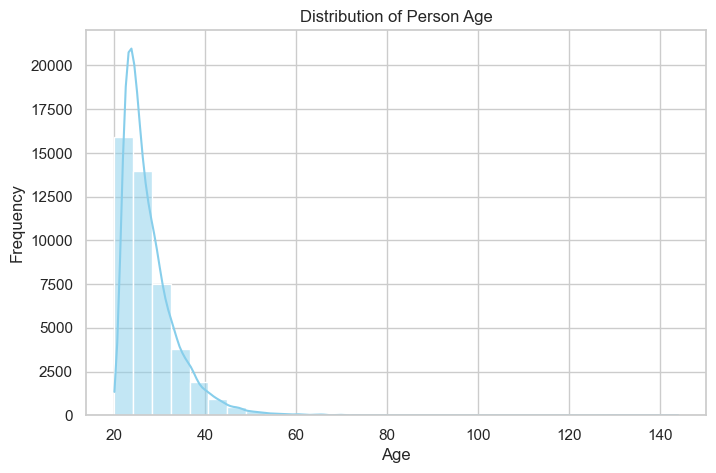

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['person_age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

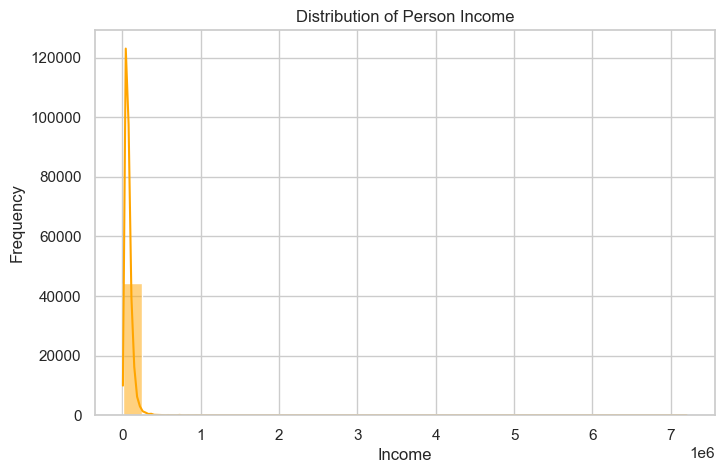

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['person_income'], bins=30, kde=True, color='orange')
plt.title('Distribution of Person Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

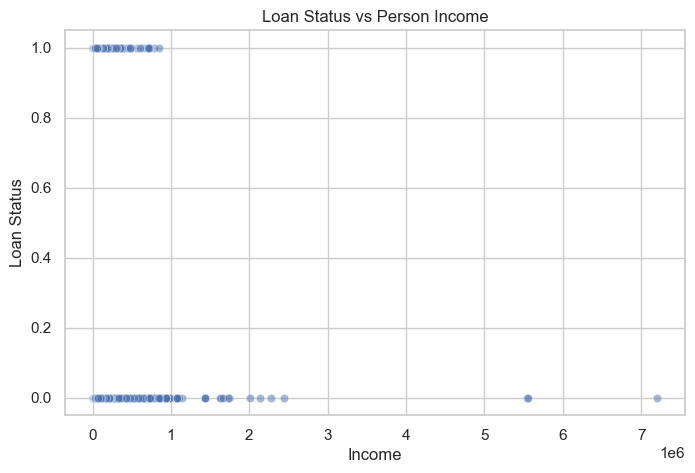

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='person_income', y='loan_status', data=df, alpha=0.5)
plt.title('Loan Status vs Person Income')
plt.xlabel('Income')
plt.ylabel('Loan Status')
plt.show()

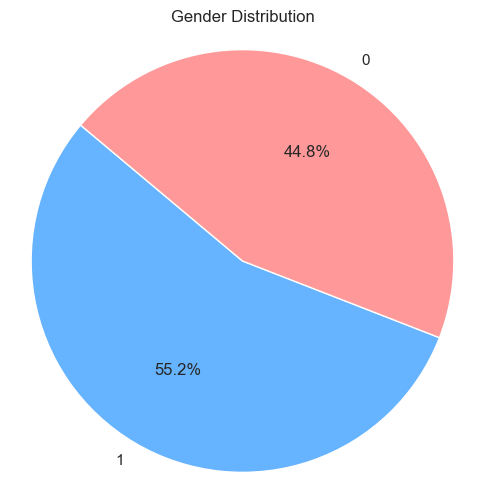

In [12]:
plt.figure(figsize=(6, 6))
gender_counts = df['person_gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

# Correlation Matrix

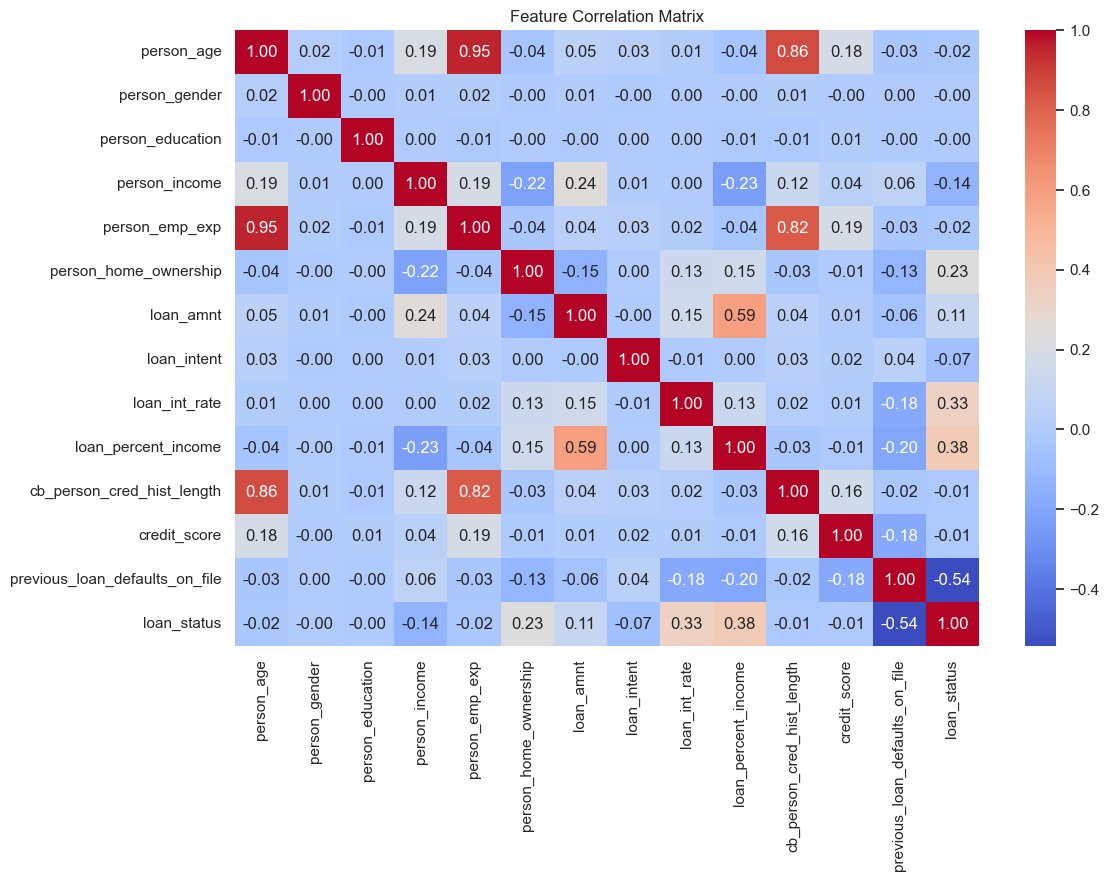

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Detect and Visualize Outliers

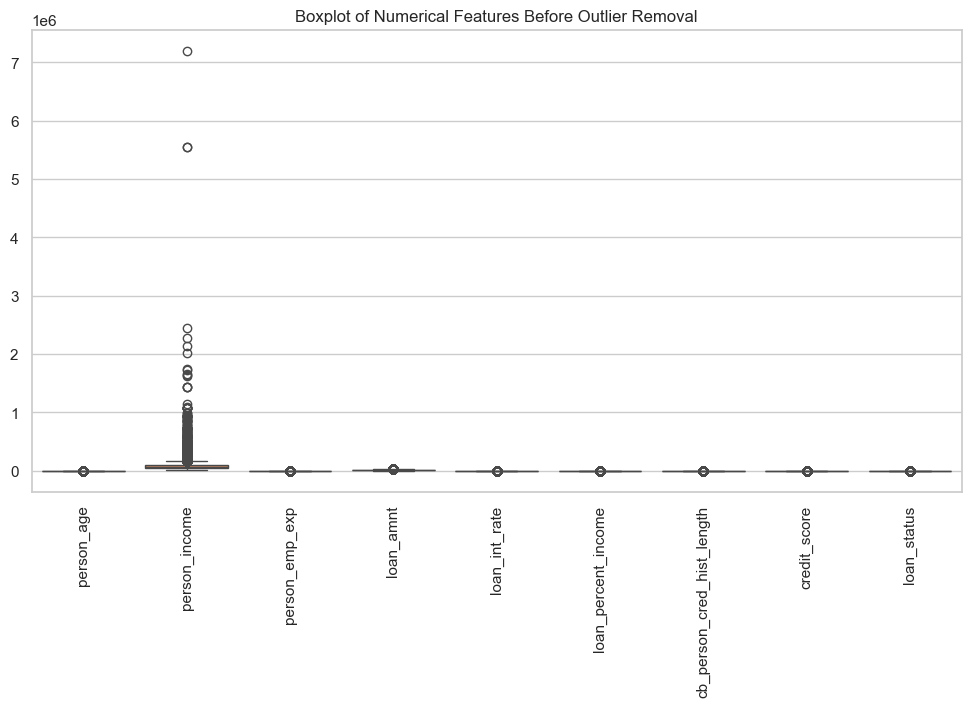

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot of Numerical Features Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()

# Remove Outliers

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)]

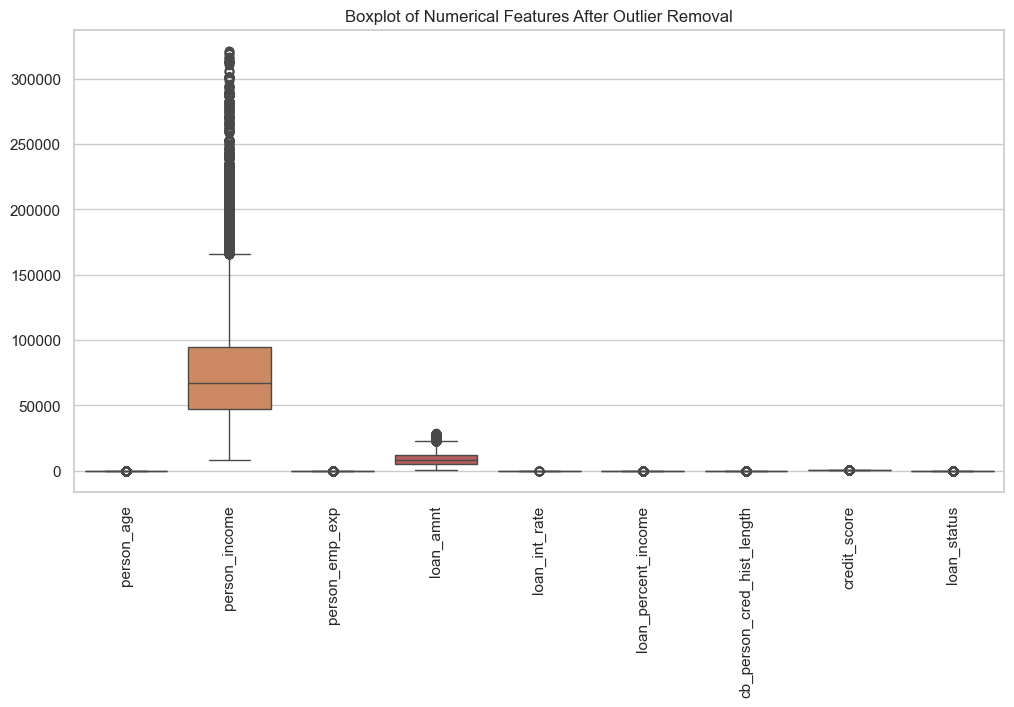

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot of Numerical Features After Outlier Removal")
plt.xticks(rotation=90)
plt.show()

# Encode Categorical Variables

In [17]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 
                    'loan_intent', 'previous_loan_defaults_on_file']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Split Data into Features (X) and Target (y)

In [18]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split into Training and Test Sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling for SVM

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Models

In [21]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Train the Models

In [22]:
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

# Make Predictions

In [23]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test_scaled)

In [24]:
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
y_prob_svm = svm_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate Models

In [25]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_rf = f1_score(y_test, y_pred_rf)
f1_svm = f1_score(y_test, y_pred_svm)

print("Random Forest Performance:")
print("Accuracy:", accuracy_rf)
print("F1-score:", f1_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9236792893875643
F1-score: 0.8098981077147016
Confusion Matrix:
 [[6512  201]
 [ 452 1391]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6713
           1       0.87      0.75      0.81      1843

    accuracy                           0.92      8556
   macro avg       0.90      0.86      0.88      8556
weighted avg       0.92      0.92      0.92      8556



In [26]:
print("\nSVM Performance:")
print("Accuracy:", accuracy_svm)
print("F1-score:", f1_svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Performance:
Accuracy: 0.9008882655446471
F1-score: 0.7585421412300684
Confusion Matrix:
 [[6376  337]
 [ 511 1332]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6713
           1       0.80      0.72      0.76      1843

    accuracy                           0.90      8556
   macro avg       0.86      0.84      0.85      8556
weighted avg       0.90      0.90      0.90      8556



# Hyperparameter Tuning for Random Forest

In [27]:
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

# Hyperparameter Tuning for SVM

In [28]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [29]:
best_rf = rf_grid.best_estimator_
best_svm = svm_grid.best_estimator_

In [30]:
y_pred_rf_best = best_rf.predict(X_test)
y_pred_svm_best = best_svm.predict(X_test_scaled)

In [31]:
y_prob_rf_best = best_rf.predict_proba(X_test)[:, 1]
y_prob_svm_best = best_svm.predict_proba(X_test_scaled)[:, 1]

In [32]:
print("\nTuned Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))


Tuned Random Forest Performance:
Accuracy: 0.9226273959794297
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6713
           1       0.87      0.76      0.81      1843

    accuracy                           0.92      8556
   macro avg       0.90      0.86      0.88      8556
weighted avg       0.92      0.92      0.92      8556

Confusion Matrix:
 [[6500  213]
 [ 449 1394]]


In [33]:
print("\nTuned SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_best))
print(classification_report(y_test, y_pred_svm_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_best))


Tuned SVM Performance:
Accuracy: 0.902875175315568
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6713
           1       0.81      0.72      0.76      1843

    accuracy                           0.90      8556
   macro avg       0.87      0.84      0.85      8556
weighted avg       0.90      0.90      0.90      8556

Confusion Matrix:
 [[6390  323]
 [ 508 1335]]


In [34]:
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_prob_rf_best)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

fpr_svm_best, tpr_svm_best, _ = roc_curve(y_test, y_prob_svm_best)
roc_auc_svm_best = auc(fpr_svm_best, tpr_svm_best)

# Plot Confusion Matrix

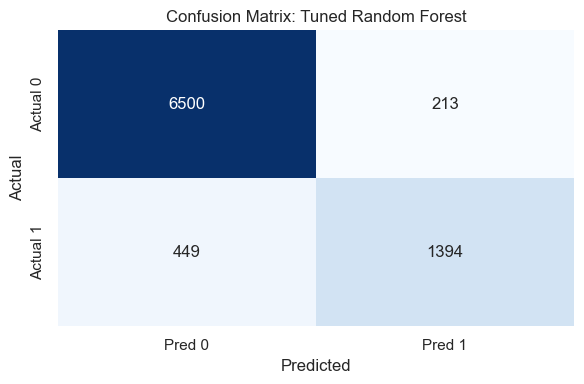

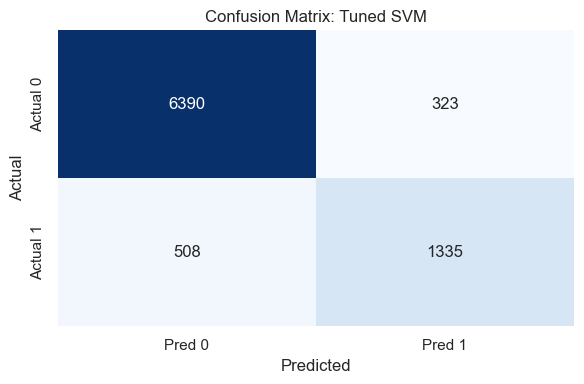

In [38]:
cm_rf = [[6500, 213],
         [449, 1394]]

cm_svm = [[6390, 323],
          [508, 1335]]

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm_rf, "Confusion Matrix: Tuned Random Forest")

plot_confusion_matrix(cm_svm, "Confusion Matrix: Tuned SVM")

# Plot ROC Curves

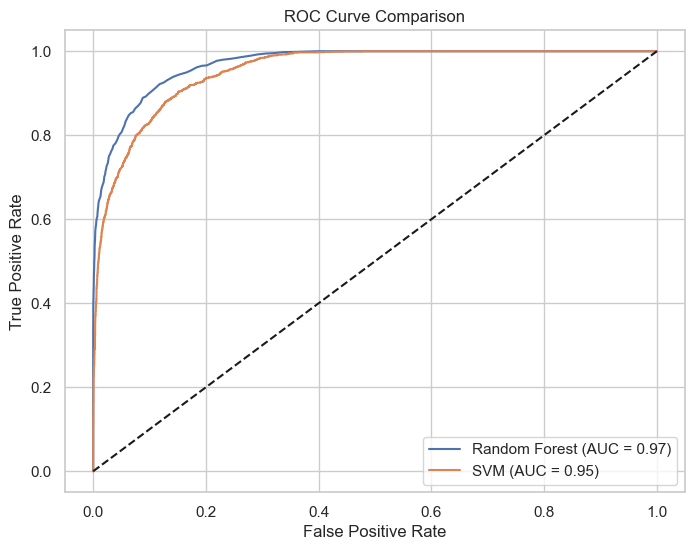

In [39]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(auc(fpr_svm, tpr_svm)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

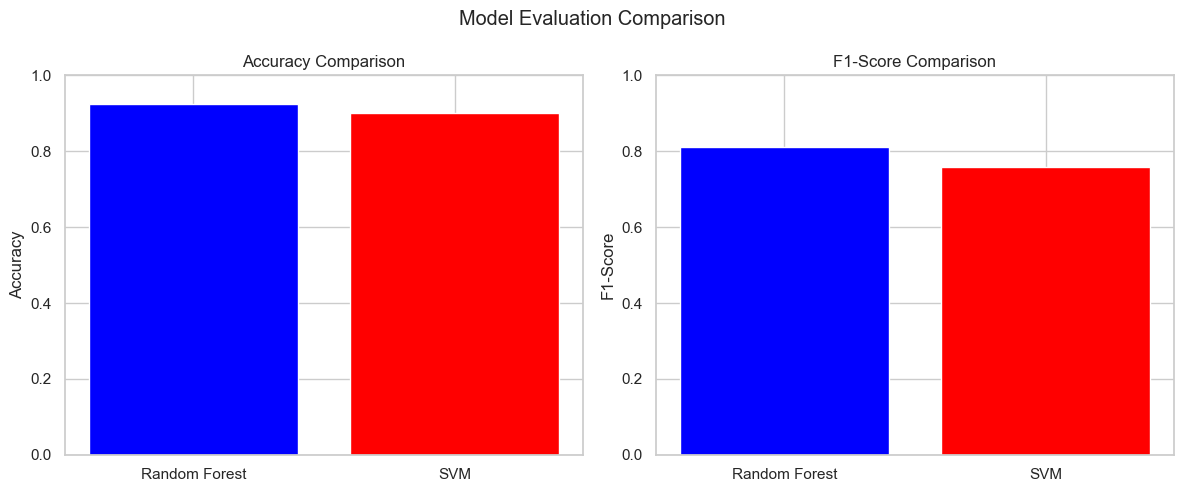

In [40]:
labels = ['Random Forest', 'SVM']
accuracies = [accuracy_rf, accuracy_svm]
f1_scores = [f1_rf, f1_svm]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(labels, accuracies, color=['blue', 'red'])
ax[0].set_title("Accuracy Comparison")
ax[0].set_ylim([0, 1])
ax[0].set_ylabel("Accuracy")

ax[1].bar(labels, f1_scores, color=['blue', 'red'])
ax[1].set_title("F1-Score Comparison")
ax[1].set_ylim([0, 1])
ax[1].set_ylabel("F1-Score")

plt.suptitle("Model Evaluation Comparison")
plt.tight_layout()
plt.show()